# Reproduction of Article
1. Steps:
    1. Import Data
    1. Initial Data Exploration
        1. Data Summary Table
    1. Comparison with article Data

In [17]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import codecs
root_path_report="C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\03_relatorio\\springer\\tables\\"
root_path_data="C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\01_dados\\01_raw\\"
root_path_analysis="C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\01_dados\\02_analysis\\01_implementation\\"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 130)
pd.set_option('display.width', 2000)


## Parse Data

In [2]:
# import cPickle as pickle
import pickle
from capacidade import Population
def export_obj(obj, path):
    with open(path, "wb") as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)


def load_obj(path):
    with open(path, "rb") as input:
        obj = pickle.load(input)
    return obj

In [3]:
# # Export table to txt for latex
# root_path_report = "C:\\Users\\debor\\Documents\\01_UFU_local\\01_comp_evolutiva\\01_trabalho_1\\03_relatorio\\template-latex\\tables\\"
# file_name = "representacao.txt"
# path = root_path_report + file_name
# with codecs.open(path, 'w', 'utf-8') as outfile:
#     outfile.write(tabela_df.to_latex(index=False))

# Open pickle Exec
file_name='v_0_exec.pkl'
# file_name='step_v_0step_exec.pkl'
path=root_path_data+file_name
infile = open(path,'rb')
ds_exec= pickle.load(infile)
infile.close()

# Open pickle dict class object pop
file_name='v_0_id.pkl'
# file_name='step_v_0_id.pkl'
path=root_path_data+file_name
infile = open(path,'rb')
ds_ind= pickle.load(infile)
infile.close()

# Unpack Data Execution
headers=["Execution","Variant","Hipervolume","Pareto Front"]
df_exec=pd.DataFrame(ds_exec,columns=headers)

# Unpack Data per Ind
headers=["Execution","Variation","Solution","Total throughput [kg]", "Max total backlog [kg]", "Mean total backlog [kg]","std dev total backlog [kg]", "Median total backlog [kg]","Min total backlog [kg]", "P(total backlog ≤ 0 kg)","Max total inventory deficit [kg]", "Mean total inventory deficit [kg]","std dev inventory deficit [kg]", "Median total inventory deficit [kg]", "Min total inventory deficit [kg]","Total Deficit [kg]","Batches [un]","Product label","Start of USP [date]","End of DSP [date]"]

df_ind=pd.DataFrame(ds_ind,columns=headers)

In [4]:
df_exec

,Execution,Variant,Hipervolume,Pareto Front
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",0.37068,"[[-621.2, 737.7228789310011], [-617.5999999999999, 708.8604598244924], [-634.1000000000001, 840.0884732523833], [-664.40000000..."


### Individuals

In [5]:
df_ind #X and Y solutions

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,-664.4,175.398621,161.514449,4.865560,161.629052,148.184403,16151.444877,974.555720,948.604516,7.694172,947.916675,933.835582,947.916675,"[31, 49, 31, 17]","[3, 2, 3, 2]","[2016-12-01, 2017-08-31, 2018-09-23, 2019-06-16]","[2017-08-31, 2018-09-23, 2019-06-16, 2019-11-27]"
1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,-441.7,63.744327,56.892965,3.185055,56.978196,48.840320,5689.296540,559.643422,494.857244,17.523500,490.288892,468.000286,490.288892,"[30, 14, 34, 8, 3, 3, 2, 3]","[3, 2, 0, 2, 3, 1, 2, 1]","[2016-12-01, 2017-08-24, 2018-01-14, 2018-10-24, 2019-02-02, 2019-04-13, 2019-06-21, 2019-08-19]","[2017-08-24, 2018-01-14, 2018-10-24, 2019-02-02, 2019-04-13, 2019-06-21, 2019-08-19, 2019-10-27]"


- Pareto Front

In [6]:
import copy
import datetime
date=datetime.datetime.now()

file_name_solutions='pop_100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47).pkl'#MODIFY THIS NAME IF NECESSARY
path=root_path_data+file_name_solutions
pop = load_obj(path)
batches=[]
products=[]
objectives=[]
for i in range(0,len(pop.batches_raw)):   
    batches.append(pop.batches_raw[i][pop.masks[i]])
    products.append(pop.products_raw[i][pop.masks[i]])
    objectives.append(pop.objectives_raw[i])
solutions= pd.DataFrame(list(zip(batches,products,objectives)), 
               columns =["Batches","Products","Objectives"]) 
file_name=str(date.day)+"-"+str(date.month)+str(date.hour)+'solutions.csv'
path=root_path_analysis+file_name
solutions.to_csv(path)
solutions

,Batches,Products,Objectives
0,"[31, 42, 24, 31]","[3, 2, 0, 3]","[-621.2, 737.7228789310011]"
1,"[31, 40, 26, 31]","[3, 2, 0, 3]","[-617.5999999999999, 708.8604598244924]"
2,"[30, 21, 4, 30, 36]","[3, 2, 1, 3, 2]","[-634.1000000000001, 840.0884732523833]"
3,"[31, 49, 31, 17]","[3, 2, 3, 2]","[-664.4000000000001, 947.9166748059137]"
4,"[24, 33, 31, 3, 30]","[3, 2, 3, 1, 3]","[-647.8000000000002, 880.1512018477226]"
5,"[30, 14, 34, 14, 30]","[3, 2, 0, 2, 3]","[-572.5999999999999, 528.8434176810308]"
6,"[25, 32, 30, 3, 31]","[3, 2, 3, 1, 3]","[-648.4000000000001, 880.7852132283679]"
7,"[31, 50, 11, 31]","[3, 2, 1, 3]","[-654.2, 890.8265418054589]"
8,"[31, 39, 25, 31]","[3, 2, 0, 3]","[-609.5999999999999, 695.7302860224008]"
9,"[31, 43, 23, 31]","[3, 2, 0, 3]","[-623.0, 756.4918194694183]"


- Pareto Front

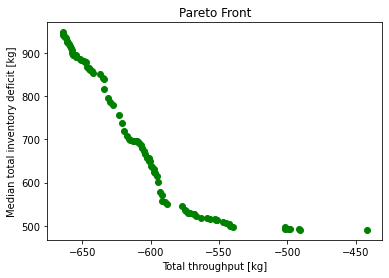

In [7]:
import matplotlib.pyplot as plt
x=pop.objectives_raw[:,0]
y=pop.objectives_raw[:,1]
plt.scatter(x,y,c="g",label="Pareto Front")
plt.title('Pareto Front')
plt.xlabel('Total throughput [kg]')
plt.ylabel('Median total inventory deficit [kg]')
file_name=str(date.day)+"-"+str(date.month)+str(date.hour)+'pareto_front.png'
path=root_path_analysis+file_name
plt.savefig(path+file_name)
plt.show()

In [8]:
file_name='df_ind_base.csv'# Article Data
path=root_path_data+file_name
df_ind_base=pd.read_csv(path)

df_ind_w=pd.concat([df_ind_base,df_ind])
path=root_path_analysis+str(date.day)+"-"+str(date.month)+str(date.hour)+".csv"
df_ind_w.to_csv(path)
df_ind_w

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,-664.4,175.398621,161.514449,4.865560,161.629052,148.184403,16151.444877,974.555720,948.604516,7.694172,947.916675,933.835582,947.916675,"[31, 49, 31, 17]","[3, 2, 3, 2]","[2016-12-01, 2017-08-31, 2018-09-23, 2019-06-16]","[2017-08-31, 2018-09-23, 2019-06-16, 2019-11-27]"
1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,-441.7,63.744327,56.892965,3.185055,56.978196,48.840320,5689.296540,559.643422,494.857244,17.523500,490.288892,468.000286,490.288892,"[30, 14, 34, 8, 3, 3, 2, 3]","[3, 2, 0, 2, 3, 1, 2, 1]","[2016-12-01, 2017-08-24, 2018-01-14, 2018-10-24, 2019-02-02, 2019-04-13, 2019-06-21, 2019-08-19]","[2017-08-24, 2018-01-14, 2018-10-24, 2019-02-02, 2019-04-13, 2019-06-21, 2019-08-19, 2019-10-27]"


# Data Analysis
## Evaluating each tests

### Main 8/1
- Main 8/1
    - Calculated demand with Monte Carlo
    - 10 Executions
    - No solution without violations, passing all in front 0
    - Total time  17632.4670568 Per execution 1763.24670568

In [9]:
# Import from csv
result=pd.read_csv(root_path_analysis+'8-1.csv')
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlometrics_front0_w_vio,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,630.1,10.435893,1.059073,2.617906,0.0,0.0,152.506570,34.1,6.420617,10.388137,0.0,0.0,0.0,[31 28 31 31],[3 2 3 2],['2016-12-01' '2017-09-11' '2018-05-30' '2019-03-10'],['2017-08-24' '2018-05-10' '2019-02-20' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlometrics_front0_w_vio,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,660.5,12.347932,1.445241,3.050971,0.0,0.0,208.114675,38.5,8.729108,12.264356,0.0,0.0,0.0,[50 31 50],[2 3 2],['2016-12-01' '2018-01-20' '2018-10-31'],['2017-12-31' '2018-10-13' '2019-11-30']


1. Attributes that seem wrong
    - P(total backlog ≤ 0 kg)	
        - My value is high, what makes sense, since I am producing large number of batches and not procuding all products.
            - This indicates I need to review my fitness, why is it focusing on product 2,3 and large batches?
                1. Modify my backlog, to consider the median
    - Max total inventory deficit [kg]	
    - Mean total inventory deficit [kg]	
    - Median total inventory deficit [kg]	
    - Min total inventory deficit [kg]	
    - Total Deficit [kg]	
    - Batches [un]
        - Large values of batches, however still only producing products 2 and 3.

### Main 14/1 14h
- Main 14/1 14h
    - New scheduling considering articles pseudo code 
    - Monte Carlo simulations=100
    - 2 Executions, with 1000 generations
    - No solution without violations, passing all in front 0
    - Total time  877 Per execution 438

In [10]:
result=pd.read_csv(root_path_analysis+'14-114.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,663.8,10.402717,1.085342,2.622689,0.0,0.0,156.289225,34.1,6.568086,10.348981,0.0,0.0,0.0,[31 36 30 31],[3 2 3 2],['1970-01-01' '2017-08-31' '2018-06-24' '2019-03-10'],['2017-08-31' '2018-06-24' '2019-03-10' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,663.8,10.402717,1.085342,2.622689,0.0,0.0,156.289225,34.1,6.568086,10.348981,0.0,0.0,0.0,[31 36 30 31],[3 2 3 2],['1970-01-01' '2017-08-31' '2018-06-24' '2019-03-10'],['2017-08-31' '2018-06-24' '2019-03-10' '2019-11-27']


1. Start time of first batch is wrong, however just fixed

1. Attributes that seem wrong
    - P(total backlog ≤ 0 kg)	
        - My value is high, what makes sense, since I am producing large number of batches and not procuding all products.
            - This indicates I need to review my fitness, why is it focusing on product 2,3 and large batches?
                1. Modify my backlog, to consider the median
    - Max total inventory deficit [kg]	
    - Mean total inventory deficit [kg]	
    - Median total inventory deficit [kg]	
    - Min total inventory deficit [kg]	
    - Total Deficit [kg]	
    - Batches [un]
        - More reasonable values of batches, however still only producing products 2 and 3. 

### 15/1 12h
- 15/1 12h
    - Main Same as 14/1 14h, but
        - Monte Carlo simulations=1000
        - 9 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time  3640.99402 Per execution 404.5548911

In [11]:
result=pd.read_csv(root_path_analysis+'15-112.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,628.3,10.934849,1.590673,3.194870,0.0,0.0,229.056858,39.2,9.175706,12.019538,0.0,0.0,0.0,[29 49 30],[3 1 3],['2016-12-01' '2017-08-17' '2019-03-15'],['2017-08-17' '2019-03-15' '2019-11-29']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,663.8,12.294408,1.312156,2.878055,0.0,0.0,188.950524,38.5,8.390956,12.072244,0.0,0.0,0.0,[39 31 28 30],[2 3 2 3],['2016-12-01' '2017-10-22' '2018-07-15' '2019-03-13'],['2017-10-22' '2018-07-15' '2019-03-13' '2019-11-27']


- However in the terminal prompt there was different values of objectives, including a total through put 
of ca. 1000 therefore I need to check properly the data to understand what is going on.
- At least now some products 1 appear.

#### Individuals

In [12]:
name="15-114"+"solutions.csv"
results=pd.read_csv(root_path_analysis+name)# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[29 49 30],[3 1 3],[628.3 0. ]
1,1,[31 47 31],[3 1 3],[632.4 0. ]
2,2,[31 17 31 12 30],[3 2 3 2 3],[648.1 0. ]
3,3,[48 31 48 2],[2 3 2 1],[653.3 0. ]
4,4,[39 31 28 30],[2 3 2 3],[663.8 0. ]
5,5,[49 30 46 3],[2 3 2 3],[647. 0.]
6,6,[20 30 48 30],[2 3 2 3],[663.2 0. ]
7,7,[30 33 31 34],[3 2 3 2],[663.8 0. ]
8,8,[30 49 29],[3 1 3],[628.3 0. ]


- Number of batches seems more normal, now the product 0 appears, however still the second objective is not ok.
    - Necessary to modify the calculation of Monte Carlo

### 16/1 11h
- 16/1 11h
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 2 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time 2316.344828 Per execution 1158.172414

In [8]:
import pandas as pd
result=pd.read_csv(root_path_analysis+'16-11.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,555.1,59.624545,51.448371,3.675727,51.270194,42.578911,5144.837076,600.258730,544.479692,18.349822,538.934509,513.782529,538.934509,[30 20 35 3 30],[3 2 0 1 3],['2016-12-01' '2017-08-24' '2018-02-25' '2018-12-12' '2019-02-19'],['2017-08-24' '2018-02-25' '2018-12-12' '2019-02-19' '2019-11-05']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,664.4,173.103326,160.542772,4.240579,160.138411,150.386980,16054.277250,975.238612,950.897649,8.460427,950.950597,929.944914,950.950597,[31 36 31 30],[3 2 3 2],['2016-12-01' '2017-08-31' '2018-06-24' '2019-03-17'],['2017-08-31' '2018-06-24' '2019-03-17' '2019-11-27']


1. Attributes analysis
    - OK 'Total throughput [kg]', 
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Forma de Calculo do backlog
                - Testarei Contar as violacoes como np.sum(np.median(distribution_sums_backlog) > 0),  # 6)Backlog violations, para count_backlog_violations_j adds if is greater than 0
    - 'Min total backlog [kg]', 
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
        - More reasonable values of batches     
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [15]:
name="16-11"+"solutions.csv"
results=pd.read_csv(root_path_analysis+name)# Import from csv
results.head(5)

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 39 26 31],[3 2 0 3],[612.7 697.03984737]
1,1,[24 21 28 30 19],[3 2 0 3 2],[579.8 588.47419239]
2,2,[25 48 31 24],[3 2 3 2],[660.8 926.38878466]
3,3,[31 22 30 46],[3 2 0 2],[596.7 632.30311669]
4,4,[30 42 25 31],[3 2 0 3],[618.8 726.31102836]


### 17/1 11h
- 17/1 11h
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 20 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time  38379.314743200004 Per execution 1918.9657371600001
            - Forma de Calculo do backlog
                - Testarei Contar as violacoes como np.sum(np.median(distribution_sums_backlog) > 0),  # 6)Backlog violations, para count_backlog_violations_j adds if is greater than 0
 

In [19]:
import pandas as pd
result=pd.read_csv(root_path_analysis+'17-111.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,-664.4,175.398621,161.514449,4.865560,161.629052,148.184403,16151.444877,974.555720,948.604516,7.694172,947.916675,933.835582,947.916675,[31 49 31 17],[3 2 3 2],['2016-12-01' '2017-08-31' '2018-09-23' '2019-06-16'],['2017-08-31' '2018-09-23' '2019-06-16' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,-441.7,63.744327,56.892965,3.185055,56.978196,48.840320,5689.296540,559.643422,494.857244,17.523500,490.288892,468.000286,490.288892,[30 14 34 8 3 3 2 3],[3 2 0 2 3 1 2 1],['2016-12-01' '2017-08-24' '2018-01-14' '2018-10-24' '2019-02-02'\n '2019-04-13' '2019-06-21' '2019-08-19'],['2017-08-24' '2018-01-14' '2018-10-24' '2019-02-02' '2019-04-13'\n '2019-06-21' '2019-08-19' '2019-10-27']


In [ ]:
1. Attributes analysis
    - 'Total throughput [kg]',
        - Negative because I must fix the inversion correction, the true value is the modulo. Fix added to code.
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Forma de Calculo do backlog
                - Testarei Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),  # 6)Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked.
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
        - More reasonable values of batches     
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [22]:
name="17-111"+"solutions.csv"
results=pd.read_csv(root_path_analysis+name)# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 42 24 31],[3 2 0 3],[-621.2 737.72287893]
1,1,[31 40 26 31],[3 2 0 3],[-617.6 708.86045982]
2,2,[30 21 4 30 36],[3 2 1 3 2],[-634.1 840.08847325]
3,3,[31 49 31 17],[3 2 3 2],[-664.4 947.91667481]
4,4,[24 33 31 3 30],[3 2 3 1 3],[-647.8 880.15120185]
5,5,[30 14 34 14 30],[3 2 0 2 3],[-572.6 528.84341768]
6,6,[25 32 30 3 31],[3 2 3 1 3],[-648.4 880.78521323]
7,7,[31 50 11 31],[3 2 1 3],[-654.2 890.82654181]
8,8,[31 39 25 31],[3 2 0 3],[-609.6 695.73028602]
9,9,[31 43 23 31],[3 2 0 3],[-623. 756.49181947]


- More Frequent batches start to appear